# DL models

Here we try a FCN

In [2]:
import pandas as pd
import numpy as np
from src.FCN import FCN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import matplotlib.pyplot as plt

## Data

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train.shape, df_test.shape

((1117957, 22), (745305, 21))

In [4]:
X,y = df_train.drop(columns=['id','FloodProbability']).values, df_train['FloodProbability'].values

# Scaling
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

# train pred split
X_train, X_val, y_train, y_val = train_test_split(X_s,y,test_size=0.2,random_state=20)

Define the model instance

In [5]:
in_dim = X_train.shape[1]
model = FCN(in_dim)
model

FCN(
  (hidden1): Linear(in_features=20, out_features=32, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=32, out_features=16, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=16, out_features=8, bias=True)
  (act3): ReLU()
  (out): Linear(in_features=8, out_features=1, bias=True)
  (act_out): Sigmoid()
)

We choose the standard **L2 Loss** (`nn.MSELoss`) and the **AdamW** optimizer

In [12]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(),lr=0.05)

In [13]:
# Convert X and y to tensors
Xt = torch.tensor(X_train,dtype=torch.float32)
yt = torch.tensor(y_train,dtype=torch.float32).reshape(-1,1)

Now let us define the training loop

In [14]:
Xt.shape[0]

894365

In [15]:
n_epochs = 20
batch_size = 20
epochs_loss = []
for epoch in range(n_epochs):
    start = time.time()
    epoch_loss = 0.0
    for i in range(0,Xt.shape[0],batch_size):
        # Forward pass
        X_b = Xt[i:i+batch_size]
        y_pred = model(X_b)

        # Loss computation
        y_b = yt[i:i+batch_size]
        loss = criterion(y_pred,y_b)
        epoch_loss += loss

        # Backprop
        loss.backward()
        optimizer.step()
    end = time.time()
    print(f'Completed epoch {epoch+1}/{n_epochs}, epoch loss: {epoch_loss} Time taken {end-start} seconds')
    epochs_loss.append(epoch_loss)

Completed epoch 1/20, epoch loss: 11480.09375 Time taken 80.8124794960022 seconds
Completed epoch 2/20, epoch loss: 11497.3369140625 Time taken 153.59643125534058 seconds
Completed epoch 3/20, epoch loss: 11497.3369140625 Time taken 59.20412564277649 seconds
Completed epoch 4/20, epoch loss: 11497.3369140625 Time taken 40.38809394836426 seconds
Completed epoch 5/20, epoch loss: 11497.3369140625 Time taken 40.22665238380432 seconds
Completed epoch 6/20, epoch loss: 11497.3369140625 Time taken 40.27253556251526 seconds
Completed epoch 7/20, epoch loss: 11497.3369140625 Time taken 40.319764375686646 seconds
Completed epoch 8/20, epoch loss: 11497.3369140625 Time taken 75.03323483467102 seconds
Completed epoch 9/20, epoch loss: 11497.3369140625 Time taken 41.77688217163086 seconds
Completed epoch 10/20, epoch loss: 11497.3369140625 Time taken 200.74470829963684 seconds
Completed epoch 11/20, epoch loss: 11497.3369140625 Time taken 202.82516503334045 seconds


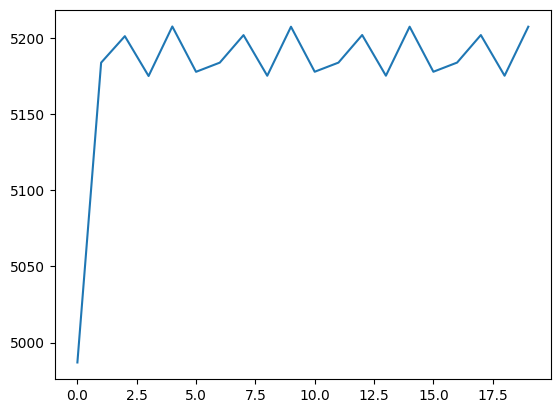

In [ ]:
plt.plot(list(range(n_epochs)),[x.detach().numpy() for x in epochs_loss])
plt.show()